In [9]:
import pandas as pd

# Load and clean datasets
air_fare_data = pd.read_csv('air_fare.csv', encoding='latin1').rename(columns=lambda x: x.strip())
fuel_data = pd.read_csv('fuel_prices.csv', encoding='latin1').rename(columns=lambda x: x.strip())
gdp_data = pd.read_csv('gdp.csv', encoding='latin1').rename(columns=lambda x: x.strip())
load_factor_data = pd.read_csv('load_factor.csv', encoding='latin1').rename(columns=lambda x: x.strip())

# Clean and preprocess Air Fare data
air_fare_data = air_fare_data[['Year', 'U.S. Average (Current $)']].rename(columns={'U.S. Average (Current $)': 'Air Fare (Current $)'})
air_fare_data = air_fare_data[(air_fare_data['Year'] >= 2003) & (air_fare_data['Year'] <= 2023)]
final_air_fare_data = air_fare_data.groupby('Year', as_index=False)['Air Fare (Current $)'].mean()

# Clean and preprocess Fuel Prices data
fuel_data = fuel_data[['Year', 'Total Cost (million dollars)']].rename(columns={'Total Cost (million dollars)': 'Fuel Total Cost (million dollars)'})
fuel_data['Fuel Total Cost (million dollars)'] = fuel_data['Fuel Total Cost (million dollars)'].replace(',', '', regex=True).astype(float)
fuel_data = fuel_data[(fuel_data['Year'] >= 2003) & (fuel_data['Year'] <= 2023)]
fuel_prices_aggregated = fuel_data.groupby('Year', as_index=False)['Fuel Total Cost (million dollars)'].sum()

# Clean and preprocess GDP data
gdp_data['Year'] = pd.to_datetime(gdp_data['Date'], errors='coerce').dt.year
gdp_data = gdp_data[['Year', 'GDP (Billions of US $)']].drop_duplicates(subset='Year').dropna()
cleaned_gdp_data = gdp_data[(gdp_data['Year'] >= 2003) & (gdp_data['Year'] <= 2023)]

# Clean and preprocess Load Factor data
load_factor_data = load_factor_data[['Year', 'TOTAL']].groupby('Year', as_index=False)['TOTAL'].mean()
load_factor_data = load_factor_data.rename(columns={'TOTAL': 'Load Factor'})
final_cleaned_data = load_factor_data[(load_factor_data['Year'] >= 2003) & (load_factor_data['Year'] <= 2023)]

# Merge datasets
merged_data = (final_air_fare_data
               .merge(fuel_prices_aggregated, on='Year', how='inner')
               .merge(cleaned_gdp_data, on='Year', how='inner')
               .merge(final_cleaned_data, on='Year', how='inner'))

# Display merged dataset
merged_data


,Year,Air Fare (Current $),Fuel Total Cost (million dollars),GDP (Billions of US $),Load Factor
0,2003,315.4300,15487.4,11456.450,73.470000
1,2004,305.8425,22758.3,12217.196,75.739231
2,2005,307.1650,33175.3,13039.197,77.661538
3,2006,328.2900,38772.0,13815.583,78.760000
4,2007,325.1300,41861.6,14474.228,79.383077
5,2008,346.1425,57888.2,14769.862,78.533077
6,2009,310.6000,32330.6,14478.067,79.557692
7,2010,335.8450,39349.7,15048.971,81.713846
8,2011,363.6550,53514.4,15599.732,81.413846
9,2012,374.7025,53415.1,16253.970,82.362308


Dataset Overview:

Summary Statistics:
              Year    Air Fare  Fuel Total Cost           GDP  Load Factor
count    21.000000   21.000000        21.000000     21.000000    21.000000
mean   2013.000000  343.169524     38958.585714  17740.668857    78.592454
std       6.204837   32.832126     13311.926825   4381.117661     7.326975
min    2003.000000  275.125000     15487.400000  11456.450000    51.128462
25%    2008.000000  315.430000     30629.900000  14478.067000    78.533077
50%    2013.000000  347.117500     38772.000000  16880.683000    81.413846
75%    2018.000000  374.702500     50629.100000  20656.516000    82.506154
max    2023.000000  396.072500     60426.800000  27360.935000    83.703846

Missing Values:
Year               0
Air Fare           0
Fuel Total Cost    0
GDP                0
Load Factor        0
dtype: int64


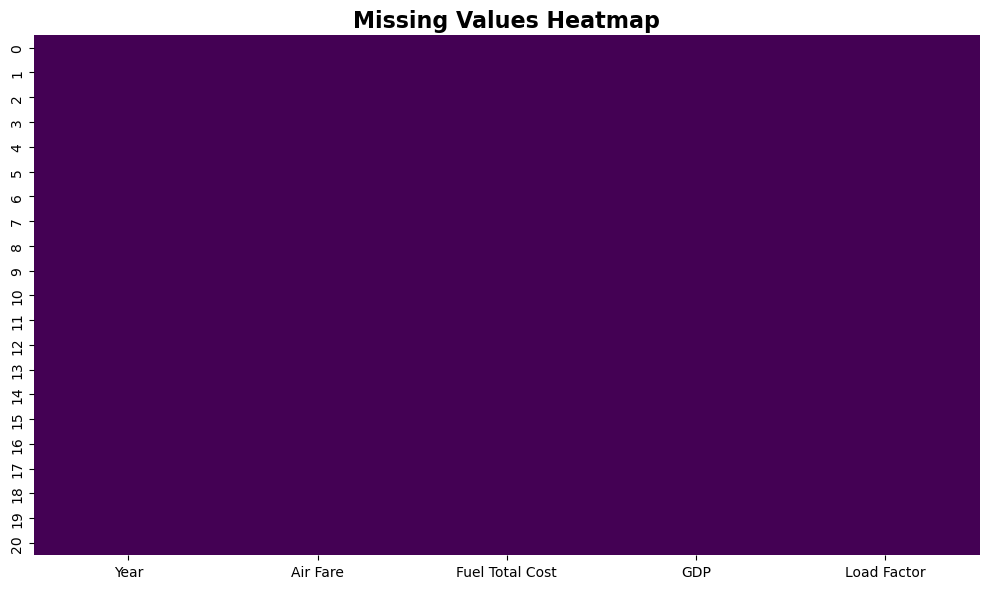


Univariate Analysis:


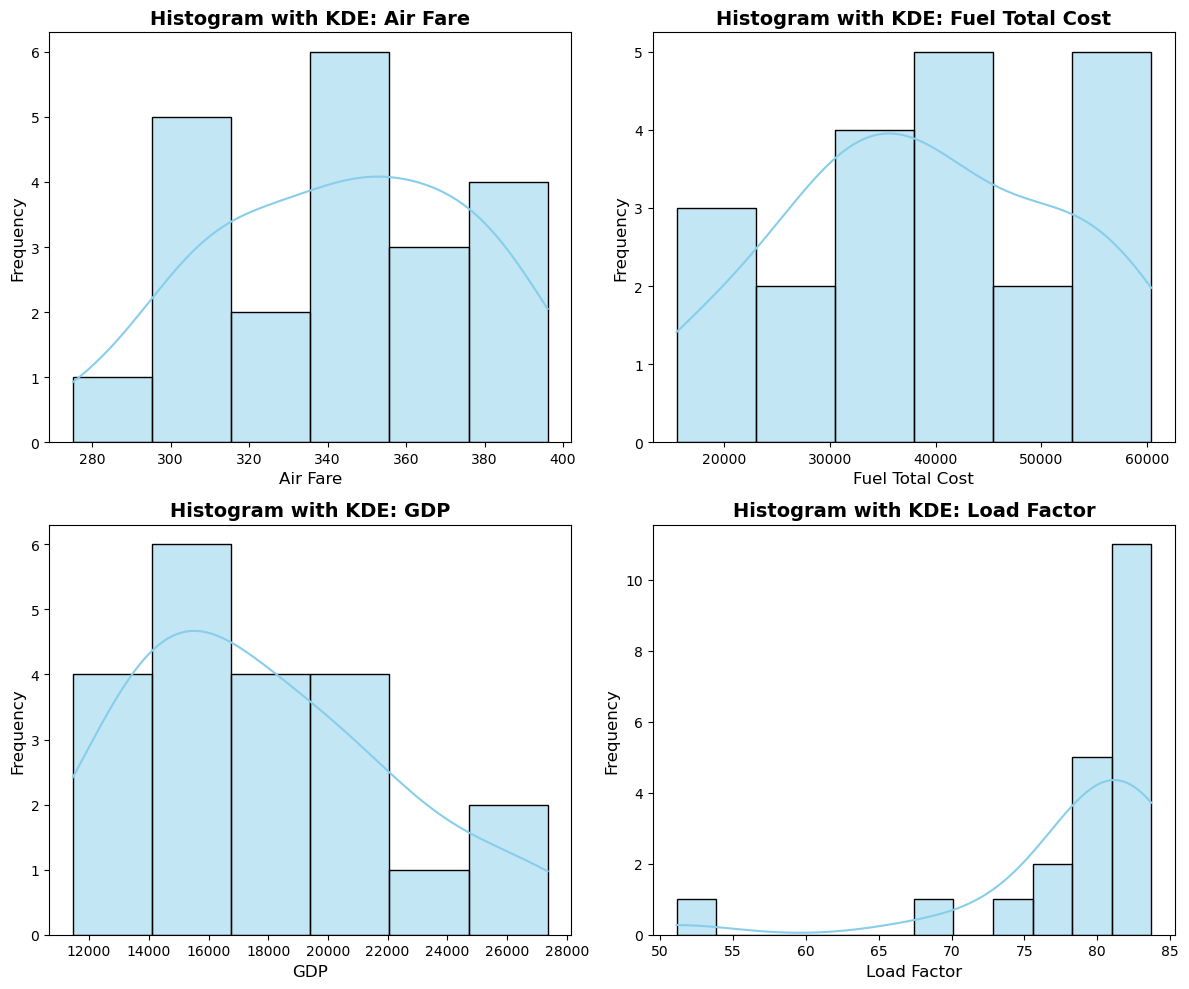

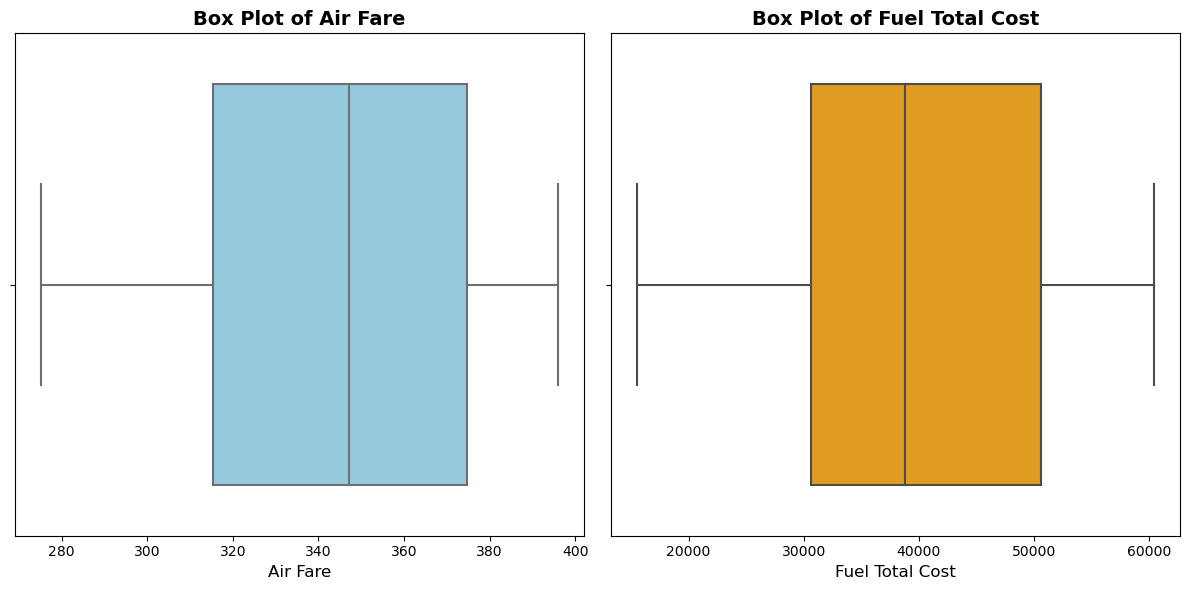


Unique Values Count:
Year               21
Air Fare           21
Fuel Total Cost    21
GDP                21
Load Factor        21
dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename columns to remove "(Current $)" for simplicity
merged_data.rename(columns={
    'Air Fare (Current $)': 'Air Fare',
    'Fuel Total Cost (million dollars)': 'Fuel Total Cost',
    'GDP (Billions of US $)': 'GDP'
}, inplace=True)

# 1. Basic Data Exploration
print("Dataset Overview:")
# Summary Statistics
print("\nSummary Statistics:")
print(merged_data.describe())

# Checking for missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())

# Visualizing missing data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis', annot=False)
plt.title("Missing Values Heatmap", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# 2. Univariate Analysis
print("\nUnivariate Analysis:")

# Add KDE to the histograms for smoother distribution visualization
plt.figure(figsize=(12, 10))
for i, column in enumerate(['Air Fare', 'Fuel Total Cost', 'GDP', 'Load Factor'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_data[column], kde=True, color='skyblue')
    plt.title(f"Histogram with KDE: {column}", fontsize=14, weight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Box plot 
plt.figure(figsize=(12, 6))

# Box plot for Air Fare
plt.subplot(1, 2, 1)
sns.boxplot(x=merged_data['Air Fare'], color='skyblue')
plt.title('Box Plot of Air Fare', fontsize=14, weight='bold')
plt.xlabel('Air Fare', fontsize=12)
plt.grid(False)  # Remove gridlines

# Box plot for Fuel Total Cost
plt.subplot(1, 2, 2)
sns.boxplot(x=merged_data['Fuel Total Cost'], color='orange')
plt.title('Box Plot of Fuel Total Cost', fontsize=14, weight='bold')
plt.xlabel('Fuel Total Cost', fontsize=12)
plt.grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()
print("\nUnique Values Count:")
print(merged_data.nunique())

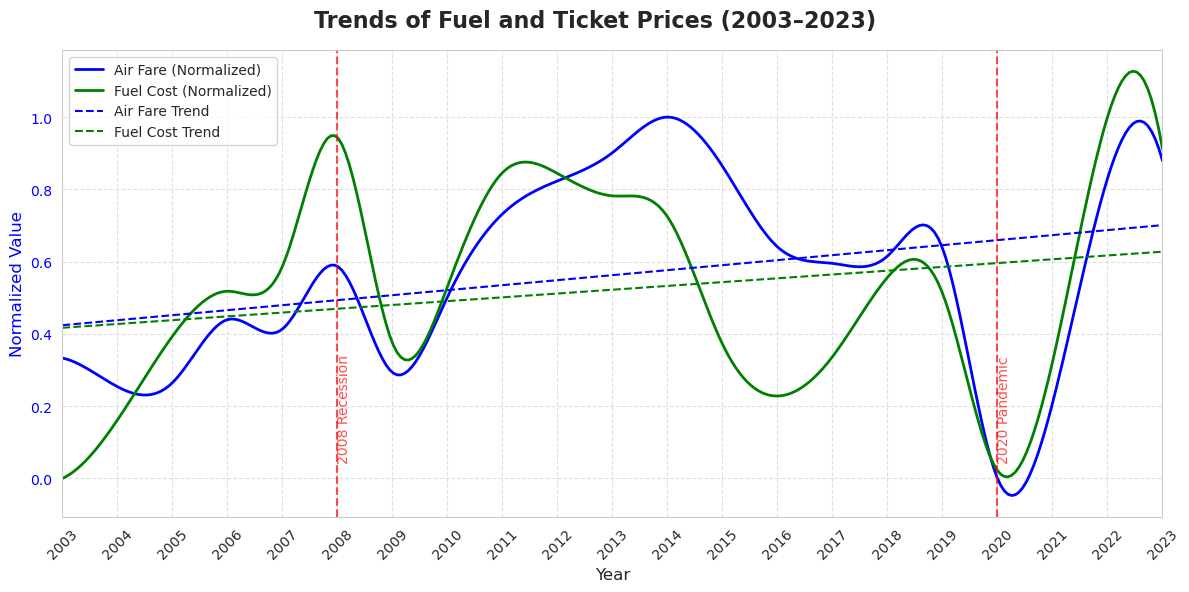

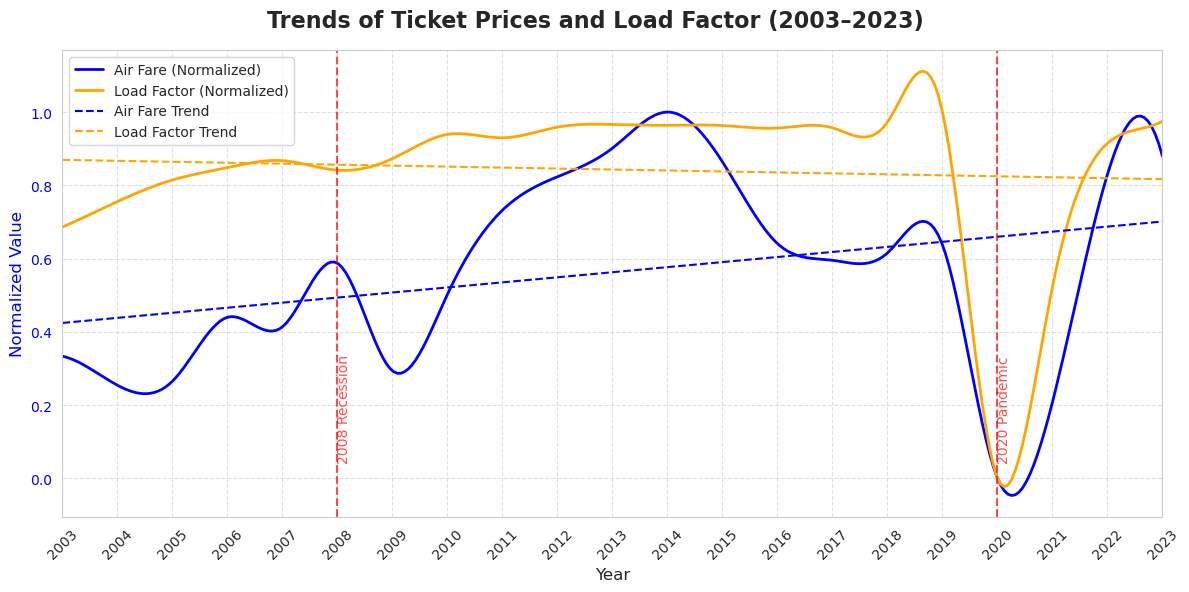

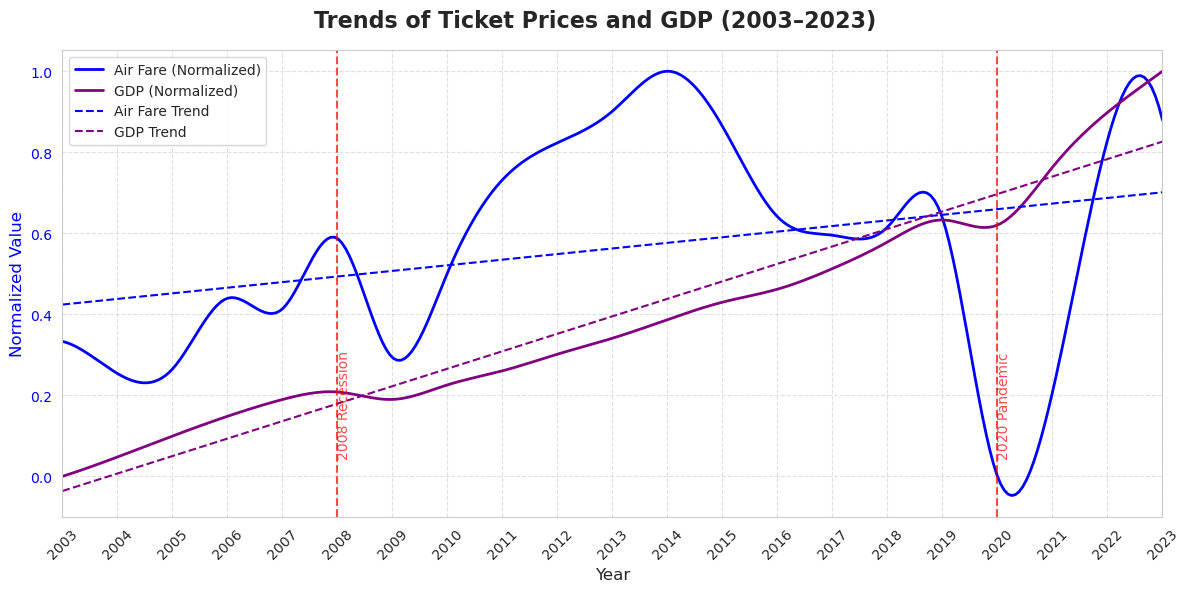

In [64]:
import numpy as np
from scipy.interpolate import make_interp_spline
from sklearn.preprocessing import MinMaxScaler


# Filter data for years 2003–2023
filtered_data = merged_data[(merged_data['Year'] >= 2003) & (merged_data['Year'] <= 2023)]

# Normalize data
scaler = MinMaxScaler()
filtered_data['Normalized Air Fare'] = scaler.fit_transform(filtered_data[['Air Fare']])
filtered_data['Normalized Fuel Cost'] = scaler.fit_transform(filtered_data[['Fuel Total Cost']])
filtered_data['Normalized Load Factor'] = scaler.fit_transform(filtered_data[['Load Factor']])
filtered_data['Normalized GDP'] = scaler.fit_transform(filtered_data[['GDP']])

def smooth_data(x, y):
    x_smooth = np.linspace(x.min(), x.max(), 300)
    y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
    return x_smooth, y_smooth

# Key events for annotation
events = {2008: "2008 Recession", 2020: "2020 Pandemic"}

# Function to plot trends
def plot_trends(x, y1, y2, label1, label2, color1, color2, title):
    x_smooth, y1_smooth = smooth_data(x, y1)
    _, y2_smooth = smooth_data(x, y2)
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(x_smooth, y1_smooth, color=color1, label=f'{label1} (Normalized)', linewidth=2)
    ax1.set_xlabel("Year", fontsize=12)
    ax1.set_ylabel("Normalized Value", fontsize=12, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(True, linestyle='--', alpha=0.6)
    
    ax1.plot(x_smooth, y2_smooth, color=color2, label=f'{label2} (Normalized)', linewidth=2)
    
    # Add trend lines
    z1 = np.polyfit(x, y1, 1)
    z2 = np.polyfit(x, y2, 1)
    ax1.plot(x_smooth, np.poly1d(z1)(x_smooth), color=color1, linestyle='--', label=f'{label1} Trend', linewidth=1.5)
    ax1.plot(x_smooth, np.poly1d(z2)(x_smooth), color=color2, linestyle='--', label=f'{label2} Trend', linewidth=1.5)
    
    # Annotate key events
    for year, label in events.items():
        ax1.axvline(x=year, color='r', linestyle='--', alpha=0.7)
        ax1.text(year, 0.05, label, rotation=90, color='red', fontsize=10, alpha=0.7)
    
    # Add legend and title
    ax1.legend(loc='upper left')
    fig.suptitle(title, fontsize=16, weight='bold' )
    ax1.set_xlim(2003, 2023)
    ax1.set_xticks(range(2003, 2024))
    ax1.set_xticklabels(range(2003, 2024), rotation=45)
    plt.tight_layout()
    plt.show()

# Plot trends
x = filtered_data['Year']
plot_trends(x, filtered_data['Normalized Air Fare'], filtered_data['Normalized Fuel Cost'],
            'Air Fare', 'Fuel Cost', 'b', 'g', "Trends of Fuel and Ticket Prices (2003–2023)")

plot_trends(x, filtered_data['Normalized Air Fare'], filtered_data['Normalized Load Factor'],
            'Air Fare', 'Load Factor', 'b', 'orange', "Trends of Ticket Prices and Load Factor (2003–2023)")

plot_trends(x, filtered_data['Normalized Air Fare'], filtered_data['Normalized GDP'],
            'Air Fare', 'GDP', 'b', 'purple', "Trends of Ticket Prices and GDP (2003–2023)")


Pearson Correlation Coefficient: 0.718


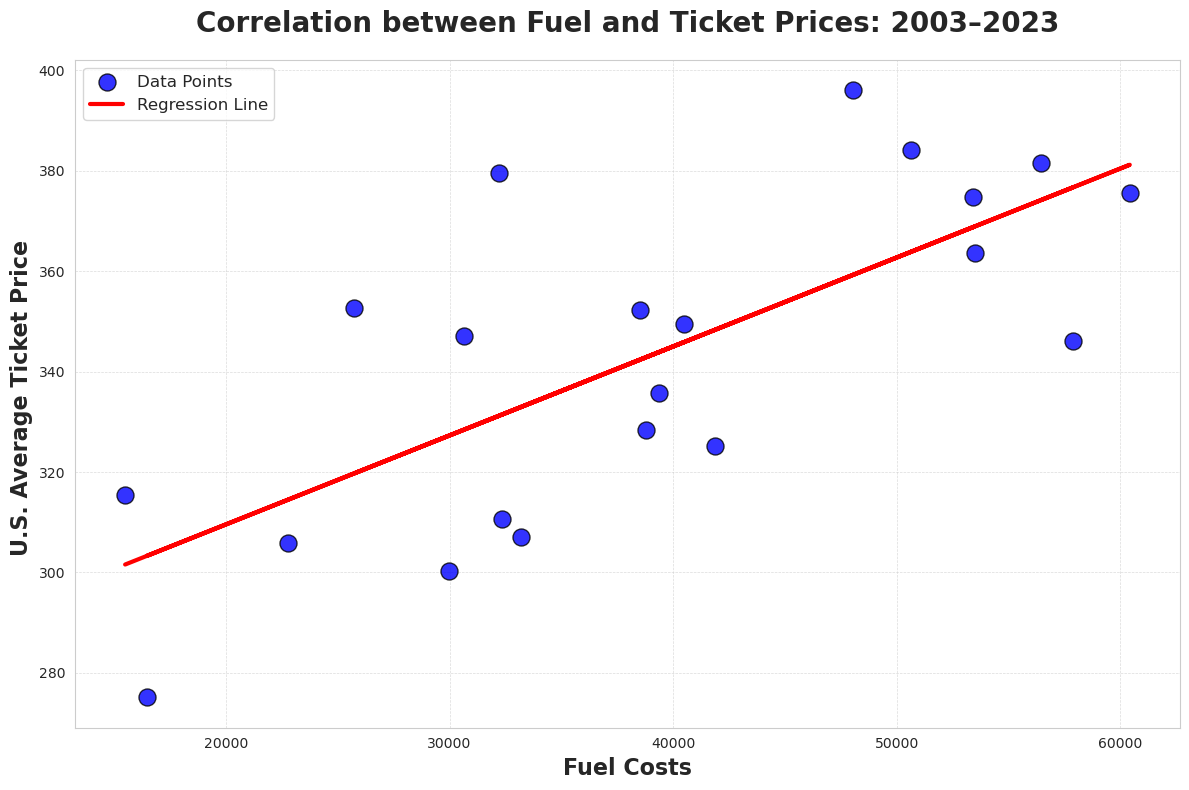

Linear Regression Coefficient (Slope): 0.00
Linear Regression Intercept: 274.14


In [21]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Load and clean datasets (replace with your actual file paths)
air_fare_data = pd.read_csv("air_fare.csv", encoding='latin1').rename(columns=lambda x: x.strip())
fuel_cost_data = pd.read_csv("fuel_prices.csv", encoding='latin1').rename(columns=lambda x: x.strip())

# Clean and preprocess Air Fare data
air_fare_data = air_fare_data[['Year', 'U.S. Average (Current $)']].rename(columns={'U.S. Average (Current $)': 'Air Fare'})
air_fare_data = air_fare_data[(air_fare_data['Year'] >= 2003) & (air_fare_data['Year'] <= 2023)]
final_air_fare_data = air_fare_data.groupby('Year', as_index=False)['Air Fare'].mean()

# Clean and preprocess Fuel Cost data
fuel_cost_data = fuel_cost_data[['Year', 'Total Cost (million dollars)']].rename(columns={'Total Cost (million dollars)': 'Fuel Total Cost'})
fuel_cost_data['Fuel Total Cost'] = fuel_cost_data['Fuel Total Cost'].replace(',', '', regex=True).astype(float)
fuel_cost_data = fuel_cost_data[(fuel_cost_data['Year'] >= 2003) & (fuel_cost_data['Year'] <= 2023)]
final_fuel_cost_data = fuel_cost_data.groupby('Year', as_index=False)['Fuel Total Cost'].sum()

# Merge datasets
final_merged_data = pd.merge(final_air_fare_data, final_fuel_cost_data, on='Year')

# 1. Compute Pearson Correlation
corr, _ = pearsonr(final_merged_data['Fuel Total Cost'], final_merged_data['Air Fare'])
print(f"Pearson Correlation Coefficient: {corr:.3f}")

# 2. Prepare Data for Linear Regression
X = final_merged_data['Fuel Total Cost'].values.reshape(-1, 1)
y = final_merged_data['Air Fare'].values

# Initialize and Fit the Model
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
y_pred = model.predict(X)

# 3. Visualization - Scatter Plot with Regression Line
plt.figure(figsize=(12, 8))

# Setting the style
sns.set_style("whitegrid")

# Creating the scatter plot with regression
sns.scatterplot(
    x=final_merged_data['Fuel Total Cost'], 
    y=final_merged_data['Air Fare'], 
    color='blue', 
    s=150, 
    alpha=0.8, 
    edgecolor='black',
    label='Data Points'
)

# Plot regression line
plt.plot(final_merged_data['Fuel Total Cost'], y_pred, color='red', linewidth=3, label='Regression Line')

# Adding axis labels and title
plt.xlabel("Fuel Costs", fontsize=16, fontweight="bold")
plt.ylabel("U.S. Average Ticket Price ", fontsize=16, fontweight="bold")
plt.title("Correlation between Fuel and Ticket Prices: 2003–2023", fontsize=20, fontweight="bold", pad=20)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()
print(f"Linear Regression Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Linear Regression Intercept: {model.intercept_:.2f}")


In [26]:
X = merged_data[['Fuel Total Cost', 'GDP', 'Load Factor']]
y = merged_data['Air Fare']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

print(f"R-squared value: {model.score(X, y):.2f}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


R-squared value: 0.74
Coefficients: [8.23957354e-04 1.78136792e-03 2.55955964e+00]
Intercept: 78.30457801035959


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

           feature        VIF
0  Fuel Total Cost  13.511606
1              GDP  16.110523
2      Load Factor  22.973366


In [31]:
#1. Check for High Correlations Between Variables
correlation_matrix = X.corr()
print(correlation_matrix)


                 Fuel Total Cost       GDP  Load Factor
Fuel Total Cost         1.000000  0.284937     0.554222
GDP                     0.284937  1.000000    -0.050742
Load Factor             0.554222 -0.050742     1.000000


In [36]:
X_reduced = X.drop(columns=['Load Factor'])  # Drop Load Factor
model.fit(X_reduced, y)
print(f"New R-squared: {model.score(X_reduced, y):.2f}")


New R-squared: 0.53


In [37]:
#Ridge Regression penalizes large coefficients, helping to mitigate multicollinearity while keeping all variables:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X, y)
print(f"R-squared (Ridge): {ridge_model.score(X, y):.2f}")


R-squared (Ridge): 0.74


In [42]:
#Analyze Coefficients in Ridge Regression:
print(f"Ridge Coefficients: {ridge_model.coef_}")


Ridge Coefficients: [8.25213737e-04 1.77996721e-03 2.55587160e+00]


In [43]:
#Tune the Regularization Parameter (alpha):
for alpha in [0.1, 1.0, 10.0]:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    print(f"Alpha: {alpha}, R-squared: {ridge_model.score(X, y):.2f}")


Alpha: 0.1, R-squared: 0.74
Alpha: 1.0, R-squared: 0.74
Alpha: 10.0, R-squared: 0.74


In [44]:
#Inspect Coefficients for Different Alpha Values:
for alpha in [0.1, 1.0, 10.0]:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    print(f"Alpha: {alpha}, Coefficients: {ridge_model.coef_}")


Alpha: 0.1, Coefficients: [8.24083156e-04 1.78122767e-03 2.55919036e+00]
Alpha: 1.0, Coefficients: [8.25213737e-04 1.77996721e-03 2.55587160e+00]
Alpha: 10.0, Coefficients: [8.36360334e-04 1.76754008e-03 2.52315136e+00]


In [47]:
#Use a Range of Alpha Values:
for alpha in [0.01, 0.1, 1.0, 10.0, 50.0, 100.0]:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    print(f"Alpha: {alpha}, R-squared: {ridge_model.score(X, y):.2f}")

Alpha: 0.01, R-squared: 0.74
Alpha: 0.1, R-squared: 0.74
Alpha: 1.0, R-squared: 0.74
Alpha: 10.0, R-squared: 0.74
Alpha: 50.0, R-squared: 0.74
Alpha: 100.0, R-squared: 0.73


In [49]:
#Finalize Ridge Model with Optimal Alpha (alpha=1.0)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
print(f"Final Coefficients: {ridge_model.coef_}")
print(f"Final R-squared: {ridge_model.score(X, y):.2f}")

Final Coefficients: [8.25213737e-04 1.77996721e-03 2.55587160e+00]
Final R-squared: 0.74


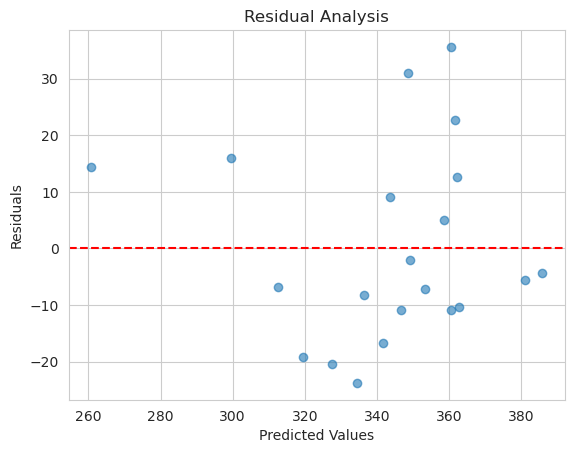

In [51]:
#2. Evaluate Residuals 
import matplotlib.pyplot as plt
y_pred = ridge_model.predict(X)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()



In [60]:
#Model Refinement:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()
huber.fit(X, y)
print(f"R-squared (Huber): {huber.score(X, y):.2f}")


R-squared (Huber): 0.66


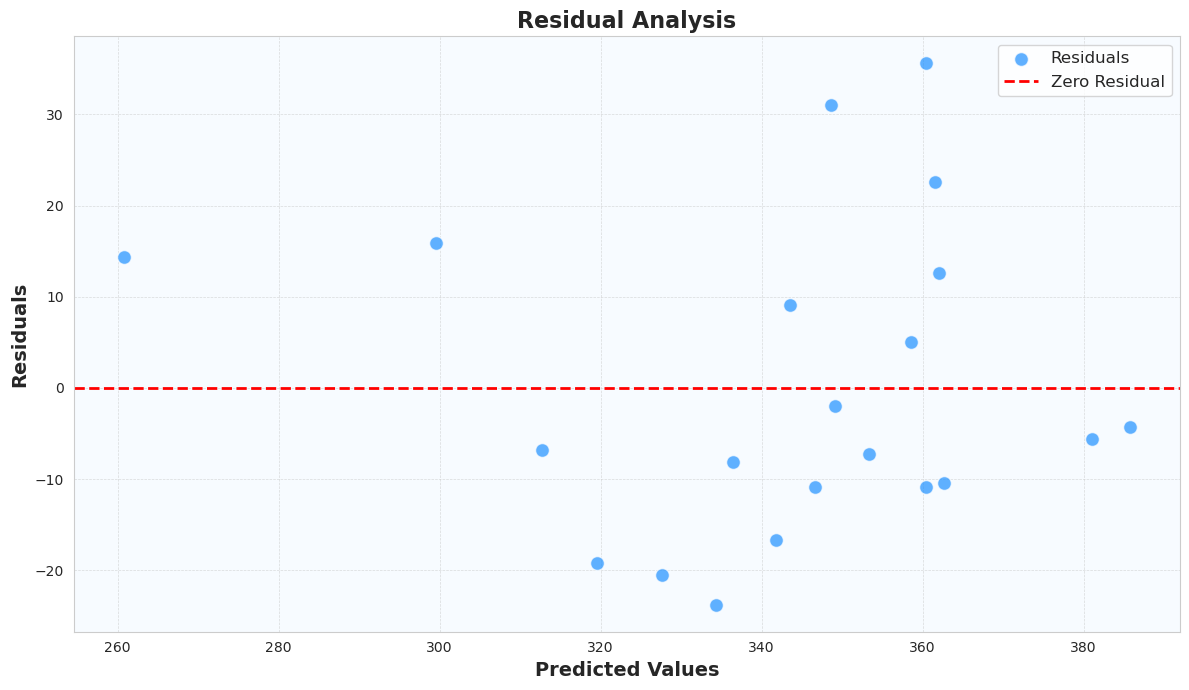

In [66]:

# Set a style 
sns.set_style("whitegrid")  

# Predict values using the ridge model
y_pred = ridge_model.predict(X)
residuals = y - y_pred

# Create a larger figure for better visibility
plt.figure(figsize=(12, 7))

# Scatter plot with bright colors and enhanced markers
scatter = plt.scatter(
    y_pred, 
    residuals, 
    alpha=0.7,               
    color='dodgerblue',  
    edgecolors='w',        
    s=100,             
    linewidth=1,            
    label='Residuals'
)

# Add a horizontal line at y=0 with a bright, distinct color
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residual')

# Enhance labels with larger font sizes and bold weight
plt.xlabel('Predicted Values', fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
plt.title('Residual Analysis', fontsize=16, fontweight='bold')

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Optionally, change the background color for added brightness
plt.gca().set_facecolor('#f7fbff')  

# Add a legend with enhanced visibility
plt.legend(fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
